# Data Analysis

Data analysis is the process of examining, cleaning, transforming, and modeling data to extract meaningful information, draw conclusions, and support decision-making. Key steps in data analysis include:

### 1. Exploratory Data Analysis (EDA)
EDA involves understanding the structure of the data, discovering patterns, and identifying important features using techniques such as data visualization and summary statistics.

### 2. Data Cleaning and Preprocessing
This step involves inspecting the dataset to identify and handle missing, inconsistent, or outlier data. It includes correcting or removing erroneous data to improve data quality.

### 3. Basic Statistical Analysis
Basic statistical analysis examines the dataset's fundamental statistical properties, such as mean, standard deviation, median, and mode, to understand central tendencies and distribution.

### 4. Visualization
Data visualization uses tools like matplotlib and seaborn to create charts, histograms, box plots, and scatter plots, helping to visually understand patterns and relationships in the data.

### 5. Analysis of Variable Relationships
Analyzing relationships between variables using techniques like correlation analysis helps identify significant variables and their interactions.


In [81]:
import warnings
import os

import numpy as np  # NumPy for numerical computing
import pandas as pd  # Pandas for data manipulation and analysis

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

warnings.simplefilter(action='ignore', category=Warning)

# Some Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Exploratory Data Analysis (EDA) Section
Exploratory Data Analysis (EDA) is a crucial step in data analysis where datasets are visually and statistically analyzed to uncover patterns, trends, and relationships within the data. Through techniques like data visualization and summary statistics, EDA aims to understand the structure of the data, identify potential outliers or missing values, and gain insights that inform further analysis or modeling decisions.

Let's continue on EDA section with reading .csv file.

In [82]:
df = pd.read_csv("Titanic-Dataset.csv")

To have some basic information on csv file, we are going to use those methods.

In [83]:
def check_df(dataframe):
    print("##################### Row and Column Count #####################")
    print(dataframe.shape)
    print("\n##################### Column Names #####################")
    print(dataframe.columns)
    print("\n##################### First Five Rows #####################")
    print(dataframe.head())
    print("\n##################### Last Five Rows #####################")
    print(dataframe.tail())
    print("\n##################### DataFrame Information #####################")
    dataframe.info()
    print("\n##################### Data Types #####################")
    print(dataframe.dtypes)


check_df(df)

##################### Row and Column Count #####################
(891, 12)

##################### Column Names #####################
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

##################### First Five Rows #####################
   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S
3            4         1       1       Futrelle, Mrs. 

To have some statistical information, we are going to use .describe() method. ".T" means we will transpose the data., for better readability.

In [84]:
print(df.describe().T)

              count    mean     std   min     25%     50%     75%     max
PassengerId 891.000 446.000 257.354 1.000 223.500 446.000 668.500 891.000
Survived    891.000   0.384   0.487 0.000   0.000   0.000   1.000   1.000
Pclass      891.000   2.309   0.836 1.000   2.000   3.000   3.000   3.000
Age         714.000  29.699  14.526 0.420  20.125  28.000  38.000  80.000
SibSp       891.000   0.523   1.103 0.000   0.000   0.000   1.000   8.000
Parch       891.000   0.382   0.806 0.000   0.000   0.000   0.000   6.000
Fare        891.000  32.204  49.693 0.000   7.910  14.454  31.000 512.329


Print the first few rows of the dataframe (default is 5)
'print(df.head())'

Print the last few rows of the dataframe (default is 5) (For example, we go with 10)
'print(df.tail(10))'

Print the number of rows and columns in the dataframe
'print(df.shape)'

In [85]:
print(df.head())
print()

print(df.tail(10))
print()

print(df.shape)
print()

   PassengerId  Survived  Pclass                                               Name     Sex    Age  SibSp  Parch            Ticket   Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male 22.000      1      0         A/5 21171  7.250   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.000      1      0          PC 17599 71.283   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female 26.000      0      0  STON/O2. 3101282  7.925   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.000      1      0            113803 53.100  C123        S
4            5         0       3                           Allen, Mr. William Henry    male 35.000      0      0            373450  8.050   NaN        S

     PassengerId  Survived  Pclass                                      Name     

The code snippet below defines a function plot_numerical_col to generate histograms for numerical columns in a DataFrame. It then selects all columns in the DataFrame and plots histograms for each selected column using the defined function. This allows for a concise visual analysis of the distribution of numerical data across the DataFrame.

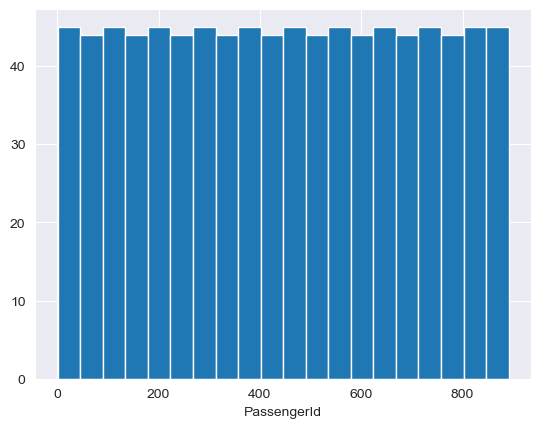

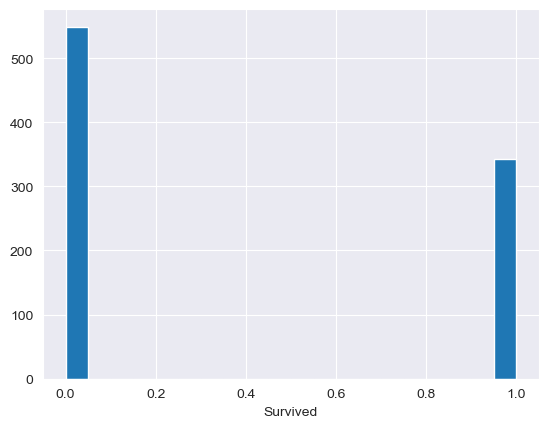

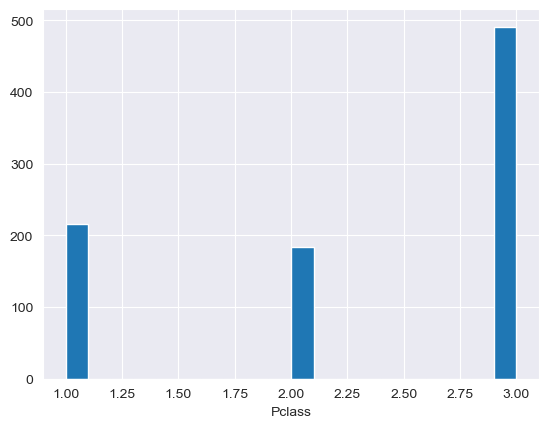

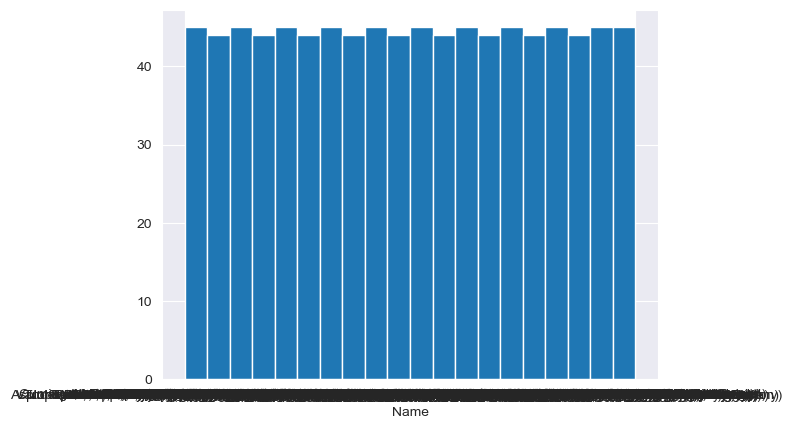

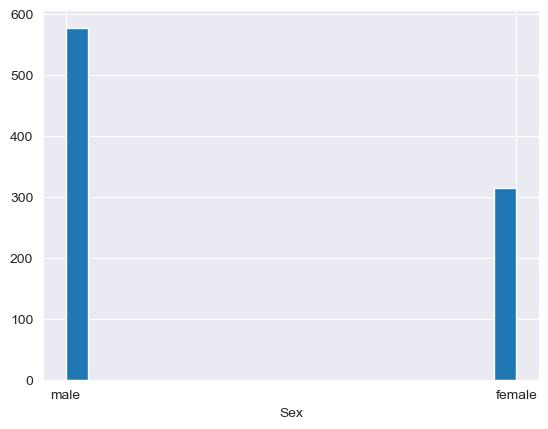

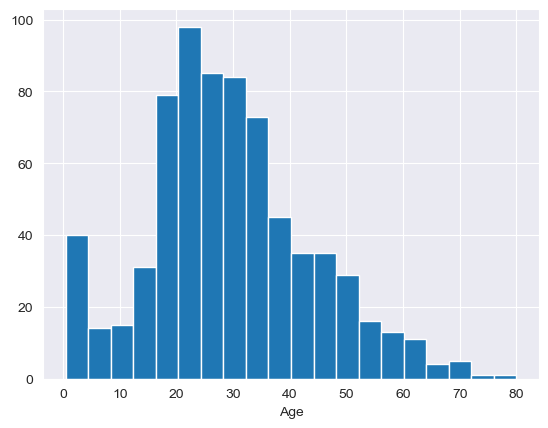

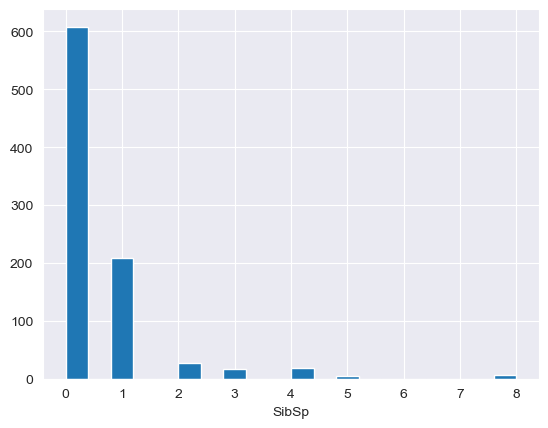

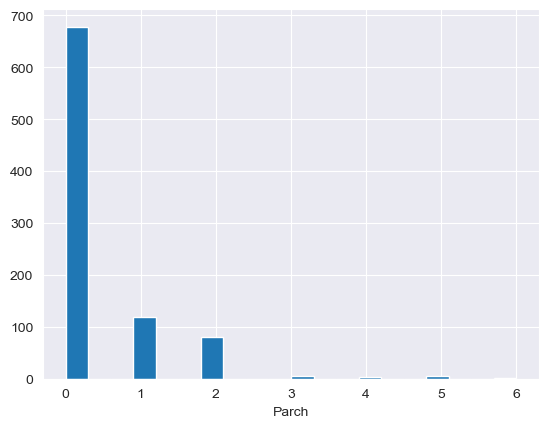

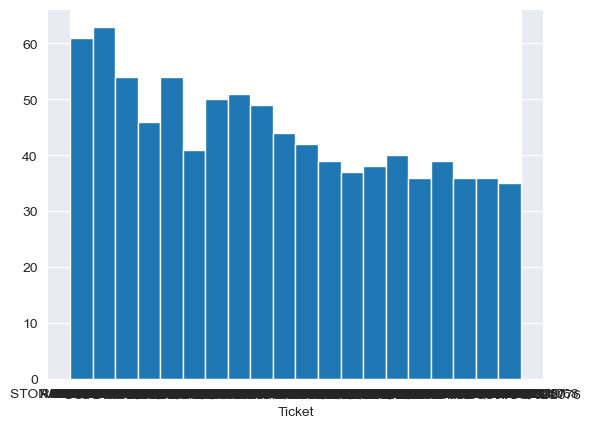

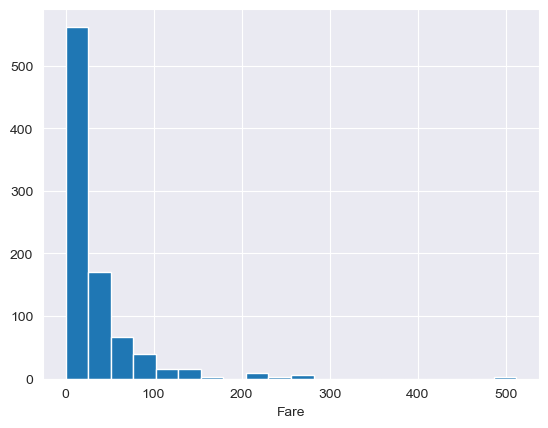

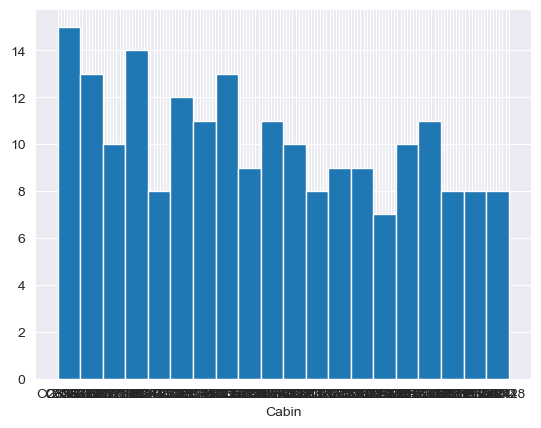

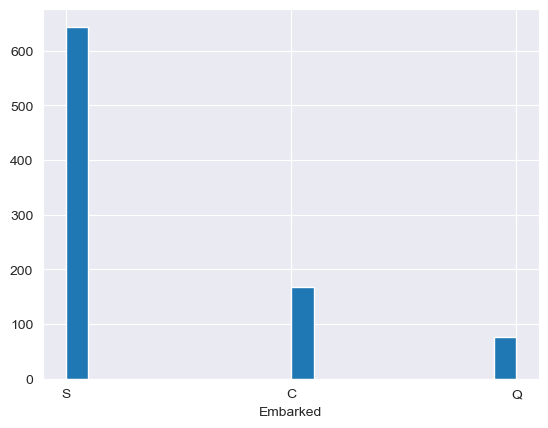

In [86]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

cols = [col for col in df.columns]

for col in cols:
    plot_numerical_col(df, col)

To have a percentage look for every column:

In [87]:
for col in cols:
    print(f"\n{col} Value Counts (%):")
    print(100 * df[col].value_counts() / len(df))


PassengerId Value Counts (%):
PassengerId
1     0.112
599   0.112
588   0.112
589   0.112
590   0.112
       ... 
301   0.112
302   0.112
303   0.112
304   0.112
891   0.112
Name: count, Length: 891, dtype: float64

Survived Value Counts (%):
Survived
0   61.616
1   38.384
Name: count, dtype: float64

Pclass Value Counts (%):
Pclass
3   55.107
1   24.242
2   20.651
Name: count, dtype: float64

Name Value Counts (%):
Name
Braund, Mr. Owen Harris                    0.112
Boulos, Mr. Hanna                          0.112
Frolicher-Stehli, Mr. Maxmillian           0.112
Gilinski, Mr. Eliezer                      0.112
Murdlin, Mr. Joseph                        0.112
                                            ... 
Kelly, Miss. Anna Katherine "Annie Kate"   0.112
McCoy, Mr. Bernard                         0.112
Johnson, Mr. William Cahoone Jr            0.112
Keane, Miss. Nora A                        0.112
Dooley, Mr. Patrick                        0.112
Name: count, Length: 891, dtype: fl

# Data Cleaning and Preprocessing Section

Data preprocessing is the initial step in data analysis, involving the transformation of raw data into a clean and organized format suitable for further analysis. This process typically includes tasks such as handling missing values, removing duplicates, scaling features, encoding categorical variables, and feature engineering. Data preprocessing aims to improve data quality, enhance model performance, and ensure that the data meets the requirements of the analytical techniques to be applied. By addressing inconsistencies and preparing the data appropriately, data preprocessing facilitates more accurate and meaningful insights during subsequent analysis tasks, such as machine learning modeling or statistical analysis.

First, we are going to take a look if there is any missing data.

"df.isnull().sum()" counts the total number of missing values in each column of a DataFrame. It returns a series where each column name corresponds to its count of missing values.

In [88]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Our dataset contains some missing values in the Age and Cabin columns. Based on our analysis preferences, we will fill the missing values in the Cabin column and drop the Age column. With the Cabin data, we can then predict the survival rate based on the area of the ship where each person was located.

In [89]:
df = df.drop(["Age"], axis=1)


In the first step, we can extract the letter portion of the "Cabin" column (e.g., the "C" in "C85"), which indicates the deck location on the ship. Using this information, we can fill in missing values by categorizing them into broader groups.

For example:

By extracting just the letter (C, B, D, etc.), we can estimate the missing values based on the passenger's class or other relevant characteristics. If we know a passenger traveled in 1st class, we can assume they were likely on the "A", "B", or "C" decks. Similarly, 3rd class passengers were typically located on the lower decks ("E", "F", "G").

In [90]:
df['Cabin_Letter'] = df['Cabin'].str[0]

df.loc[(df['Cabin_Letter'].isnull()) & (df['Pclass'] == 1), 'Cabin_Letter'] = np.random.choice(['A', 'B', 'C'], 
                                                                                              size=df[(df['Cabin_Letter'].isnull()) & (df['Pclass'] == 1)].shape[0])

df.loc[(df['Cabin_Letter'].isnull()) & (df['Pclass'] == 2), 'Cabin_Letter'] = np.random.choice(['D', 'E', 'F'], 
                                                                                              size=df[(df['Cabin_Letter'].isnull()) & (df['Pclass'] == 2)].shape[0])

df.loc[(df['Cabin_Letter'].isnull()) & (df['Pclass'] == 3), 'Cabin_Letter'] = np.random.choice(['G', 'H', 'I'], 
                                                                                              size=df[(df['Cabin_Letter'].isnull()) & (df['Pclass'] == 3)].shape[0])

In [91]:
print(df['Cabin_Letter'].isnull().sum())

0


In [92]:
print(df['Cabin_Letter'].head(10))

0    I
1    C
2    G
3    C
4    G
5    I
6    E
7    G
8    G
9    F
Name: Cabin_Letter, dtype: object


We will fill null cells with most frequent values on 'Embarked' column.

In [93]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [94]:
print(df['Embarked'].isnull().sum())

0


We have filled all null cells. 

So now, we are going to check and replace our outliers. Outliers basically means noises of our dataset. Those noises do not represenst main number patters of our datas. For example, pragnancies datas can not be more than 9 month or lower than 0 month. Thant means our pragnacies range is 0-9. We should exclude the datas not in our range. To exclude those outlier noises, we are going to implement two function named “check_outlier” and “outlier_tresholds”.

The first function, outlier_thresholds, calculates lower and upper limits for identifying outliers in a numerical column of a DataFrame based on quartiles and interquartile range. The second function, check_outlier, checks for outliers in a column using the limits obtained from the first function, returning True if any outliers are found, and False otherwise.

In [95]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
# Check for just numerical cells    
numeric_cols = df.select_dtypes(include=[np.number]).columns


for col in numeric_cols:
    print(col, check_outlier(df, col))

PassengerId False
Survived False
Pclass False
SibSp True
Parch True
Fare True


According to results, 'SibSp' 'Parch' 'Fare' column has outliers.

Then, let’s replace the outliers in the Insulin column with our range limits which will be calculated in the function below. If outlier variable higher than up_limit, replace it with up_limit. Else if outlier variable lower than low_limit, replace it with low_limit.

In [96]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "SibSp")

replace_with_thresholds(df, "Parch")

replace_with_thresholds(df, "Fare")

In [97]:
numeric_cols = df.select_dtypes(include=[np.number]).columns


for col in numeric_cols:
    print(col, check_outlier(df, col))

PassengerId False
Survived False
Pclass False
SibSp False
Parch False
Fare False


Let's scale our numerical columns and include it back to DF

In [98]:
from sklearn.preprocessing import StandardScaler


numeric_cols = df.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

df[numeric_cols] = df_numeric_scaled

print(df.head())


   PassengerId  Survived  Pclass                                               Name     Sex  SibSp  Parch            Ticket   Fare Cabin Embarked Cabin_Letter
0       -1.730    -0.789   0.827                            Braund, Mr. Owen Harris    male  0.447 -0.477         A/5 21171 -0.557   NaN        S            I
1       -1.726     1.267  -1.566  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  0.447 -0.477          PC 17599  0.920   C85        C            C
2       -1.722     1.267   0.827                             Heikkinen, Miss. Laina  female -0.482 -0.477  STON/O2. 3101282 -0.541   NaN        S            G
3       -1.718     1.267  -1.566       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  0.447 -0.477            113803  0.501  C123        S            C
4       -1.715    -0.789   0.827                           Allen, Mr. William Henry    male -0.482 -0.477            373450 -0.538   NaN        S            G


# Data Visualization Section

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. Additionally, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion.

In our project, we are going to use these libraries to visualize our dataset.

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

As a first example, we can visualize mean, median, mode and standart deviation.

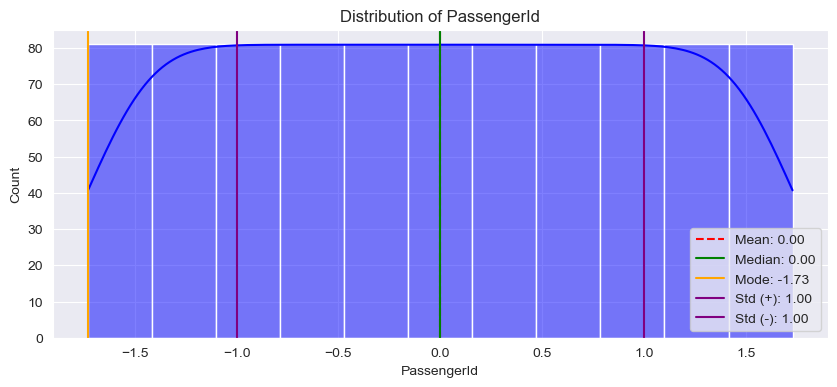

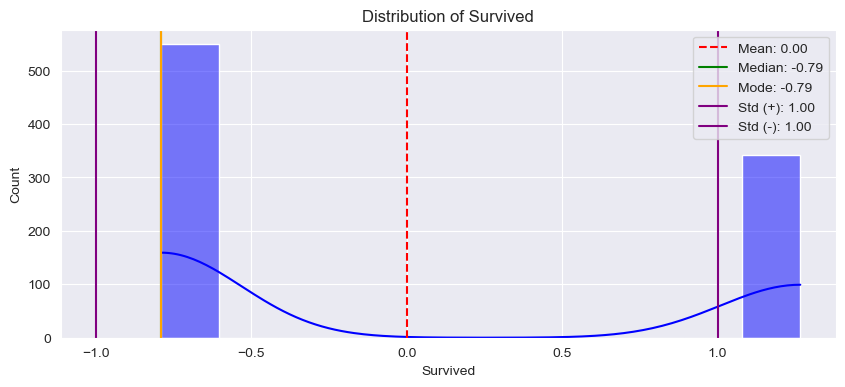

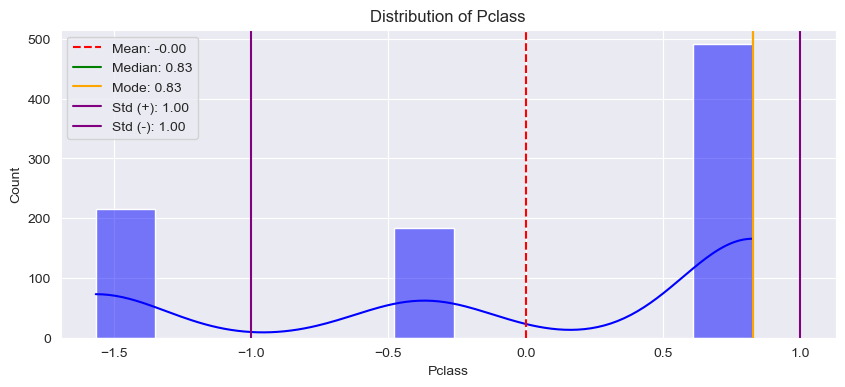

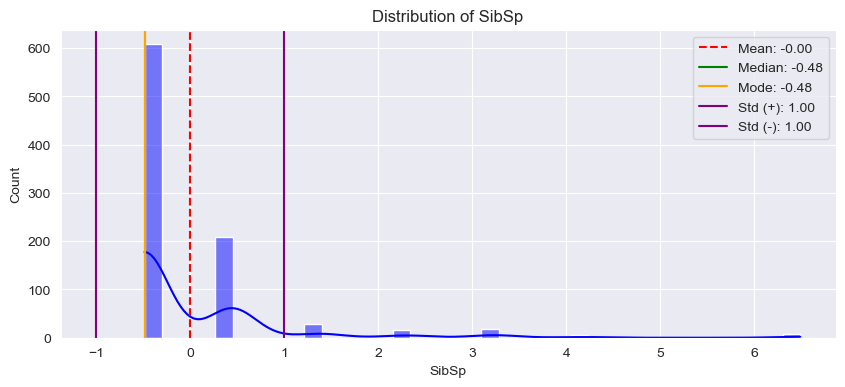

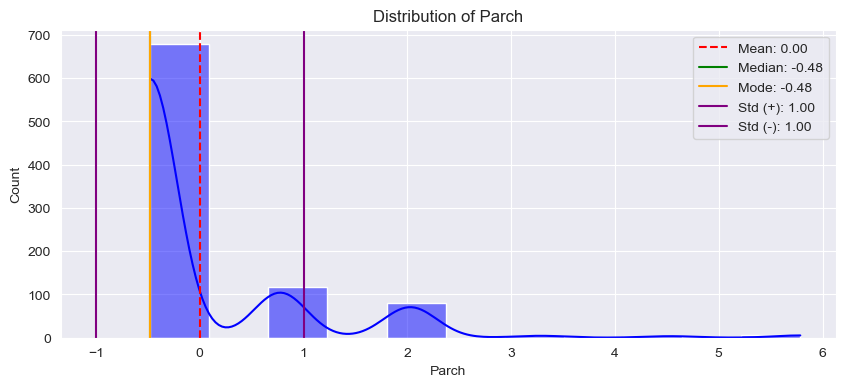

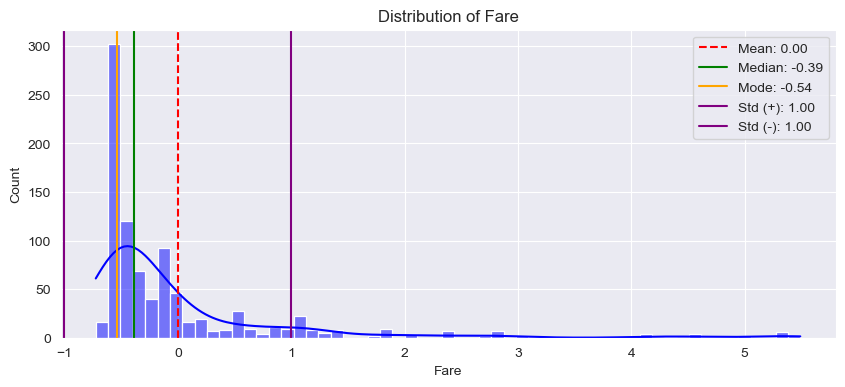

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

mean_values = df[numeric_cols].mean()
median_values = df[numeric_cols].median()
mode_values = df[numeric_cols].mode().iloc[0]
std_values = df[numeric_cols].std()

for column in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, color='blue') 
    plt.axvline(mean_values[column], color='red', linestyle='--', label=f'Mean: {mean_values[column]:.2f}')  
    plt.axvline(median_values[column], color='green', linestyle='-', label=f'Median: {median_values[column]:.2f}')  
    plt.axvline(mode_values[column], color='orange', linestyle='-', label=f'Mode: {mode_values[column]:.2f}')  
    plt.axvline(mean_values[column] + std_values[column], color='purple', linestyle='-', label=f'Std (+): {std_values[column]:.2f}')  
    plt.axvline(mean_values[column] - std_values[column], color='purple', linestyle='-', label=f'Std (-): {std_values[column]:.2f}')  
    plt.title(f'Distribution of {column}') 
    plt.legend() 
    plt.show() 


Let's go with Seaborn. We can basicly create scatter plots using sns.scatterplot for each numerical column. The x-axis represents the index of the DataFrame, and the y-axis represents the values of the column.

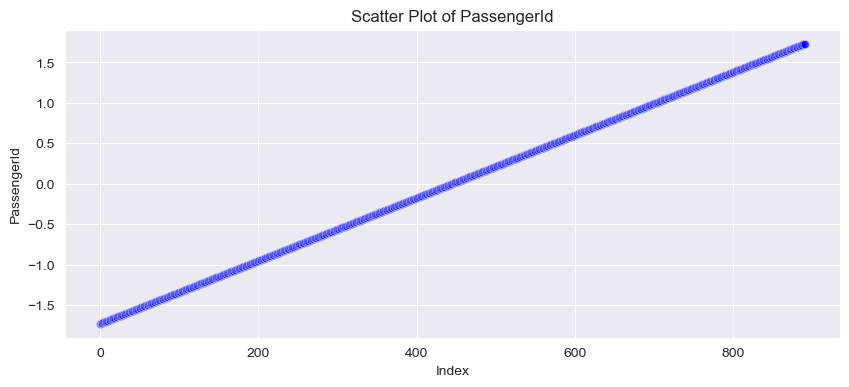

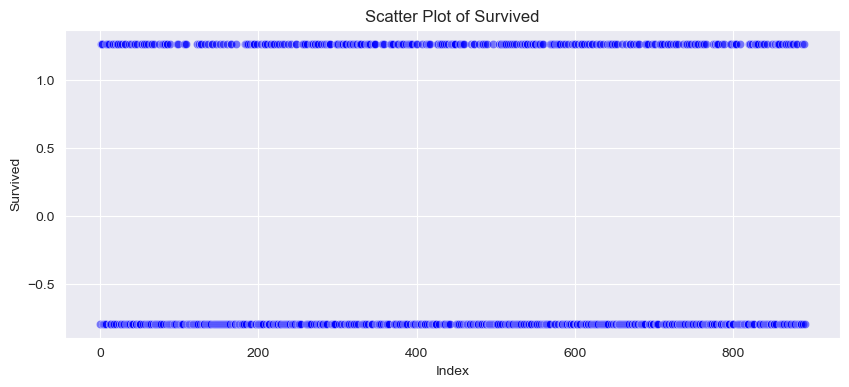

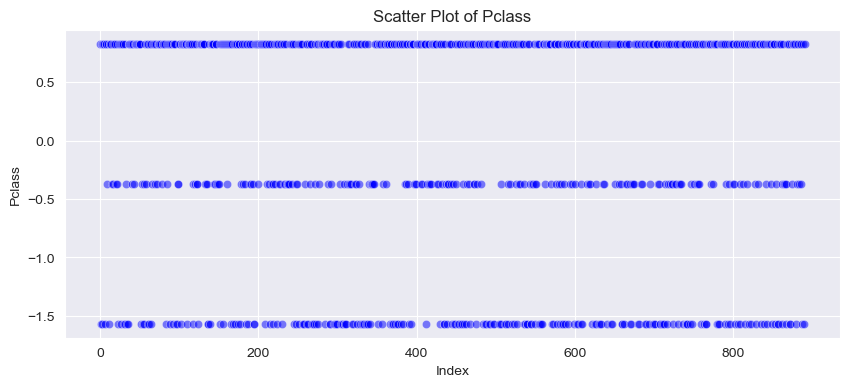

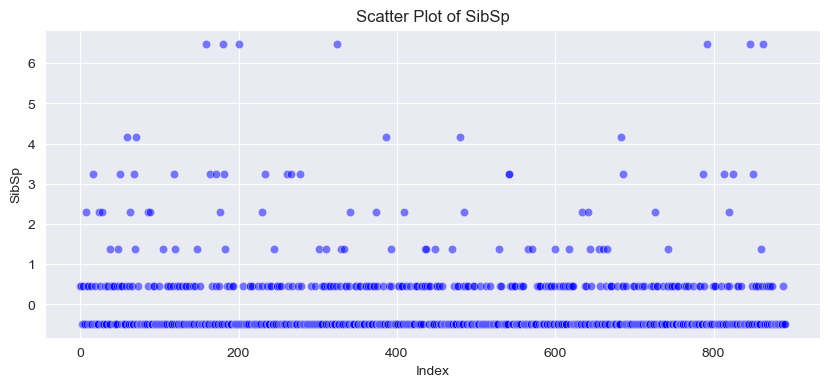

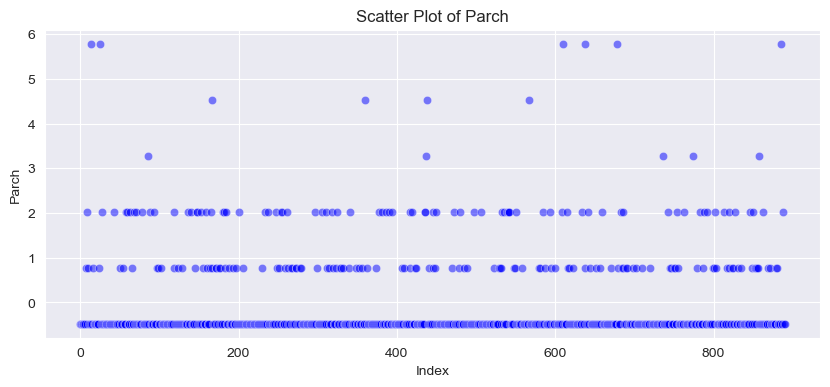

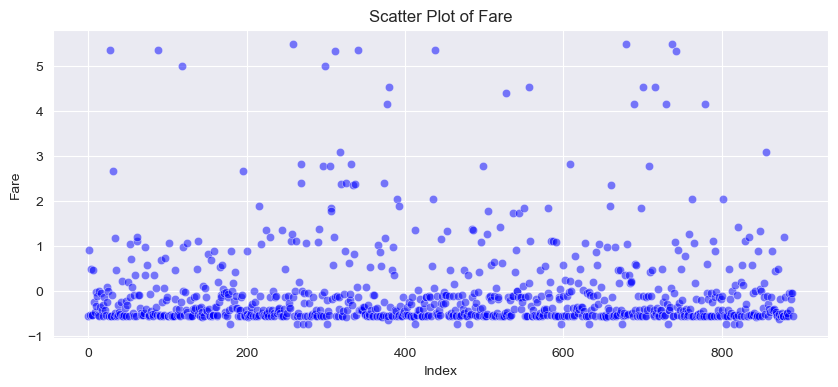

In [101]:
for column in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=df.index, y=df[column], alpha=0.5, color='blue')
    
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

As third example, we can create a histogram for each numeric column.
It enriches the histogram with Kernel Density Estimate (KDE).
Histogram helps visualize the distribution of data.

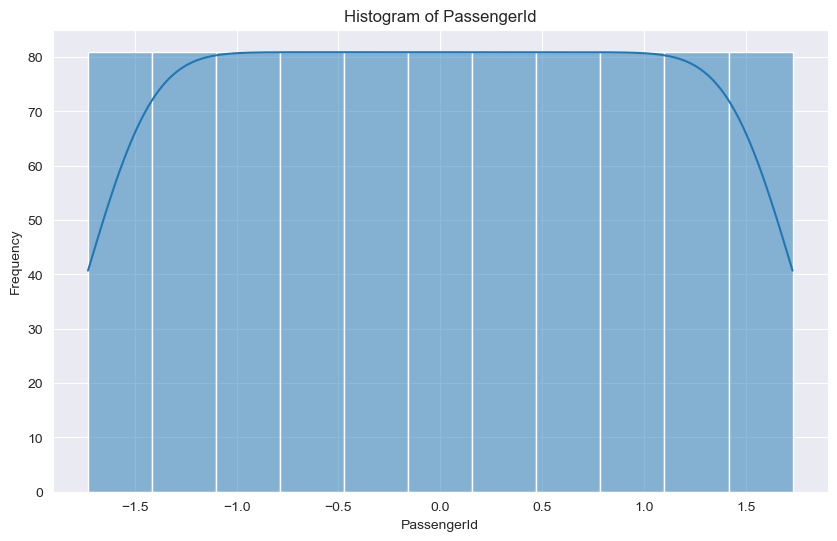

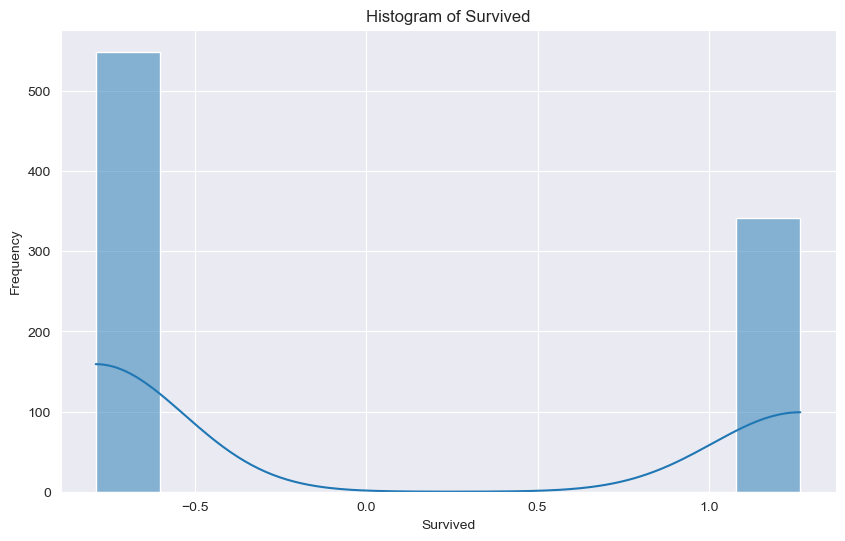

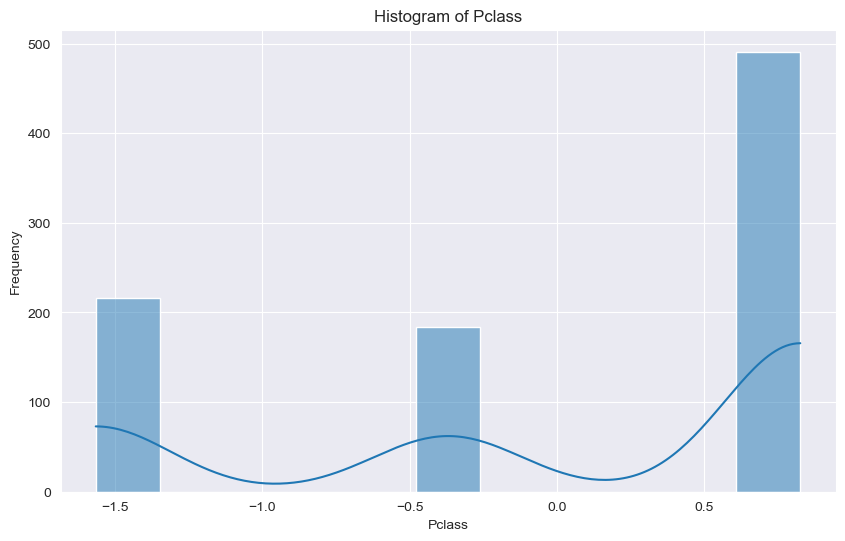

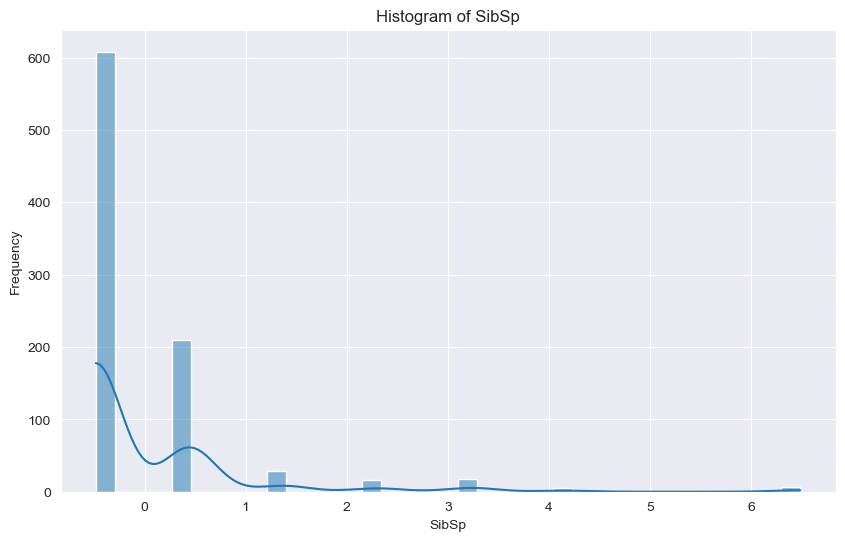

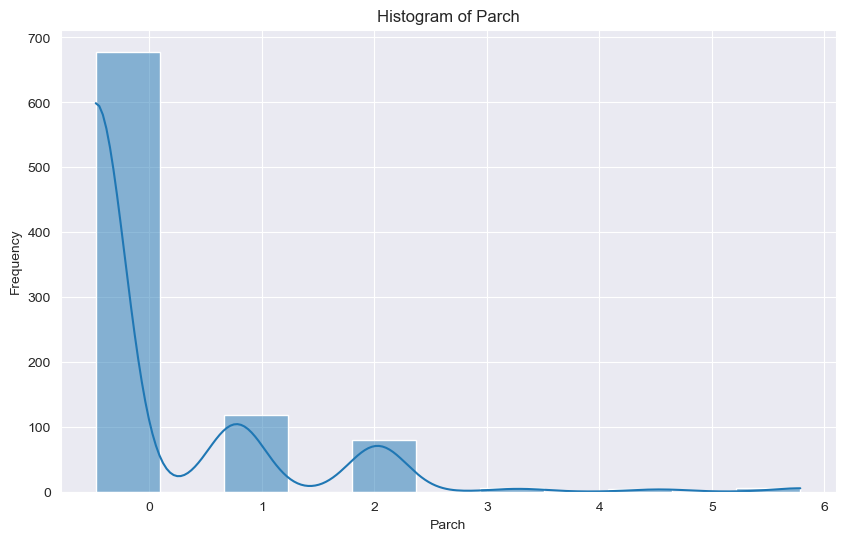

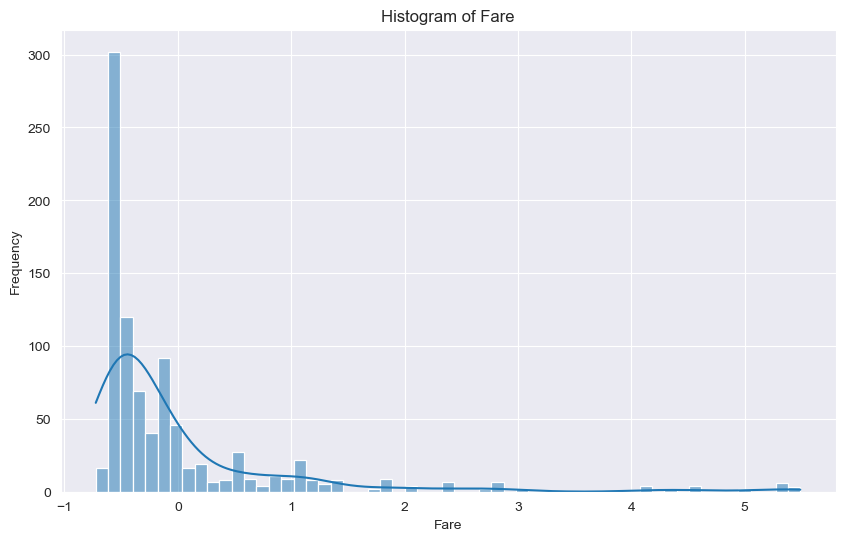

In [102]:
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


As fourth , we can create a box plot for each numeric column.
Boxplots visualize the distribution, median, and outliers of data.

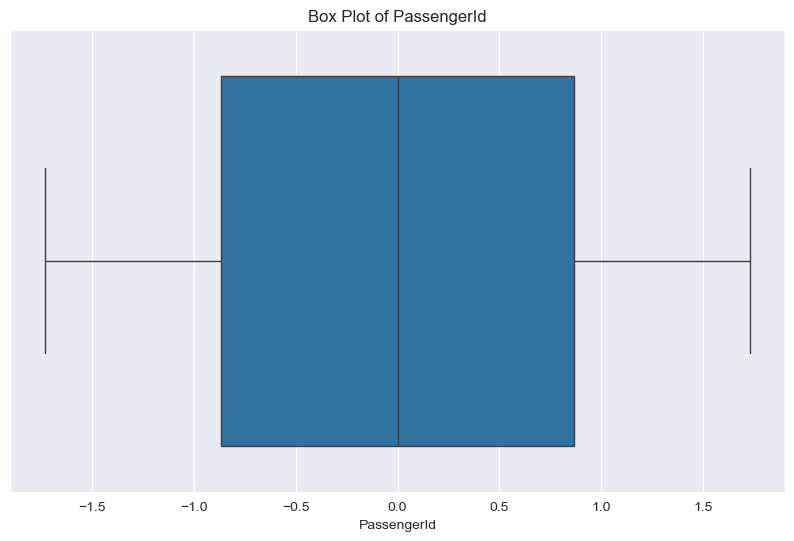

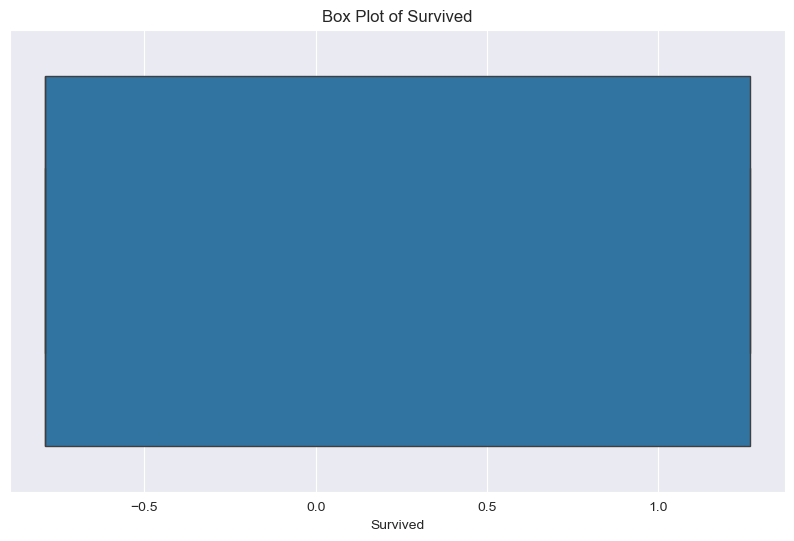

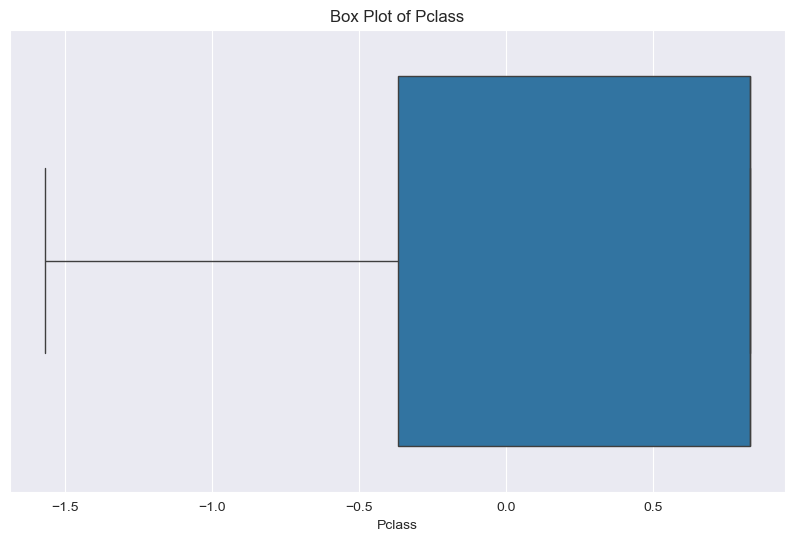

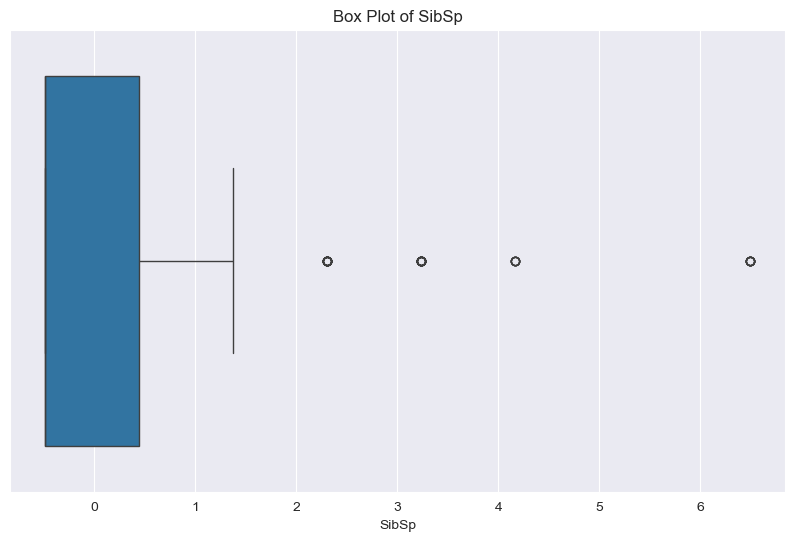

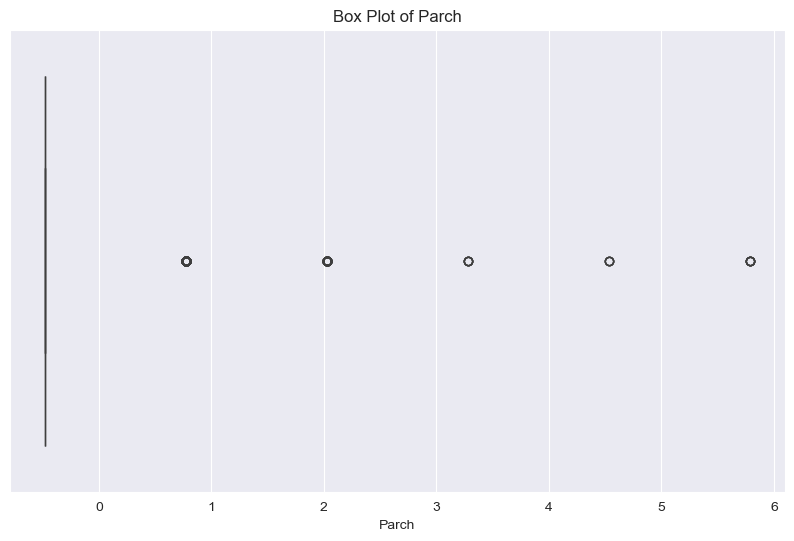

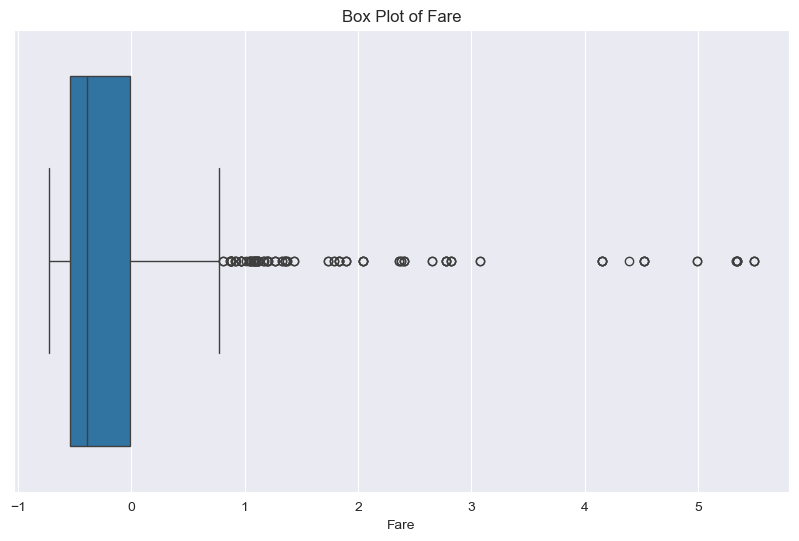

In [103]:
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

This visualization below shows the survival probability of passengers based on their Cabin (deck) on the Titanic. The bar chart illustrates the survival rates for each Cabin Letter, calculated as the average survival for passengers on each deck.

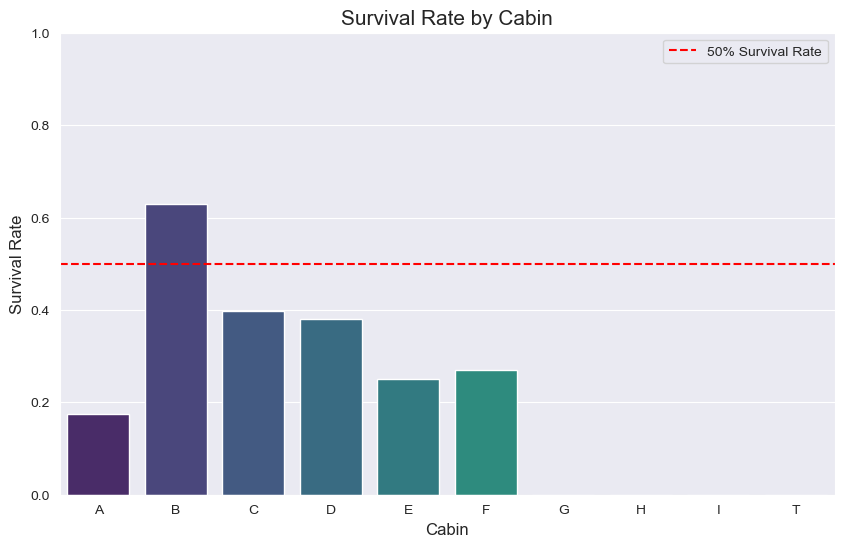

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns


cabin_survival = df.groupby('Cabin_Letter')['Survived'].mean()


plt.figure(figsize=(10, 6))
sns.barplot(x=cabin_survival.index, y=cabin_survival.values, palette='viridis')


plt.title('Survival Rate by Cabin', fontsize=15)
plt.xlabel('Cabin', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.ylim(0, 1) 
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Survival Rate')  


plt.legend()
plt.show()


# Analysis of Relationships Between Variables

The analysis of relationships between variables is a critical aspect of data analysis that helps to understand how variables in a dataset interact with each other. Identifying these relationships can provide valuable insights, such as discovering patterns, making predictions, and informing decision-making processes. 

We are going to investigate those relationships with correlation matrix.

**Correlation analysis** measures the strength and direction of the linear relationship between two numerical variables. The correlation coefficient, ranging from -1 to 1, indicates:

+1: Perfect positive correlation (as one variable increases, the other increases).
-1: Perfect negative correlation (as one variable increases, the other decreases).
0: No correlation (no linear relationship between the variables).

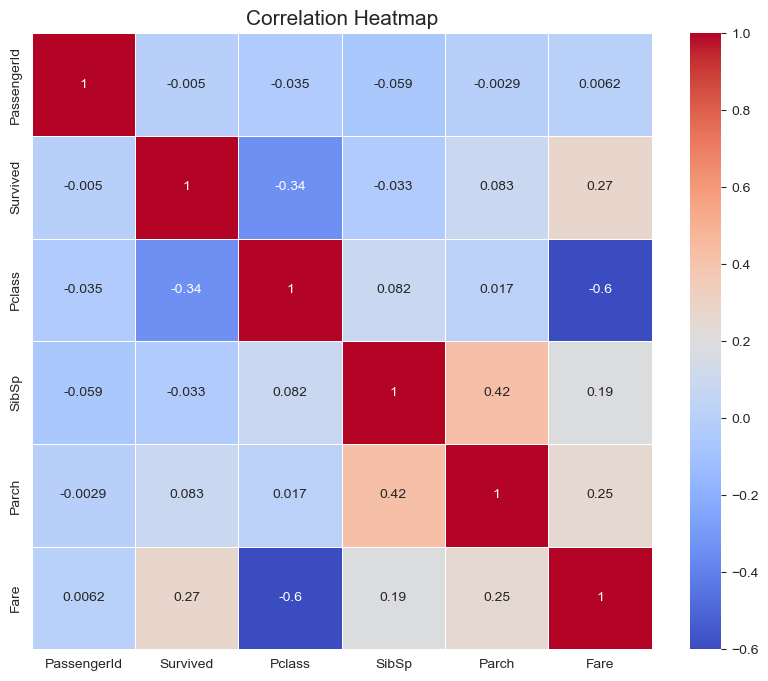

In [105]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()


Seaborn's pairplot() function displays the relationships and distributions between multiple numerical variables in a single visual. It plots the scatter plot for each pair of variables and shows the distribution of each variable along the diagonal.

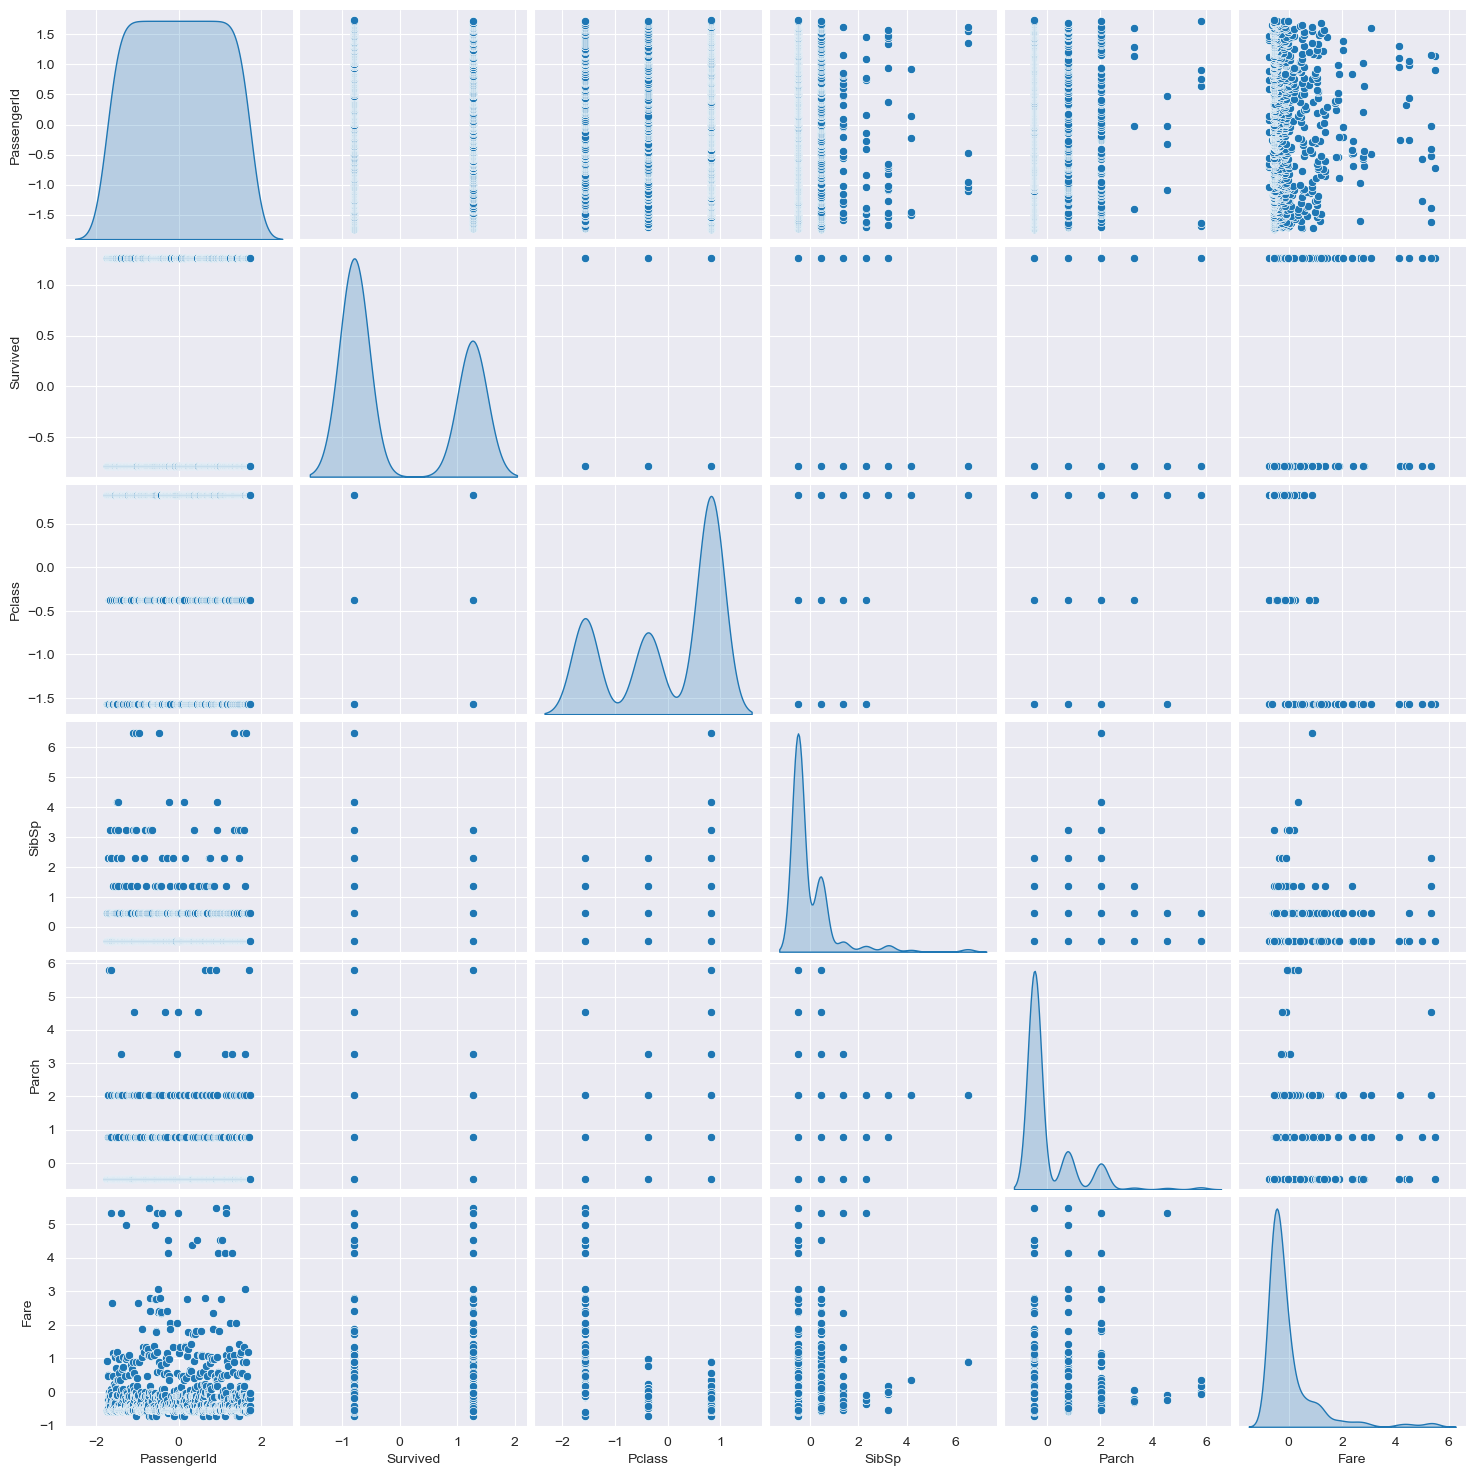

In [106]:
import seaborn as sns

sns.pairplot(df[numeric_cols], diag_kind='kde', kind='scatter')
plt.show()


The function below is designed to calculate and display the mean of a numerical column, grouped by the target variable. As example, we choose "Survived" column to analyse relationship between every other column.

In [107]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in numeric_cols:
    target_summary_with_num(df, "Survived", col)

          PassengerId
Survived             
-0.789          0.004
1.267          -0.006


          Survived
Survived          
-0.789      -0.789
1.267        1.267


          Pclass
Survived        
-0.789     0.267
1.267     -0.429


          SibSp
Survived       
-0.789    0.026
1.267    -0.042


          Parch
Survived       
-0.789   -0.066
1.267     0.106


           Fare
Survived       
-0.789   -0.214
1.267     0.343



To examine the survival rate by group according to categorical variables, you can take an average using the groupby() function.

In [108]:
print(df.groupby('Pclass')['Survived'].mean())

print(df.groupby('Embarked')['Survived'].mean())

print(df.groupby('Sex')['Survived'].mean())


Pclass
-1.566    0.505
-0.369    0.183
0.827    -0.291
Name: Survived, dtype: float64
Embarked
C    0.349
Q    0.012
S   -0.092
Name: Survived, dtype: float64
Sex
female    0.737
male     -0.401
Name: Survived, dtype: float64


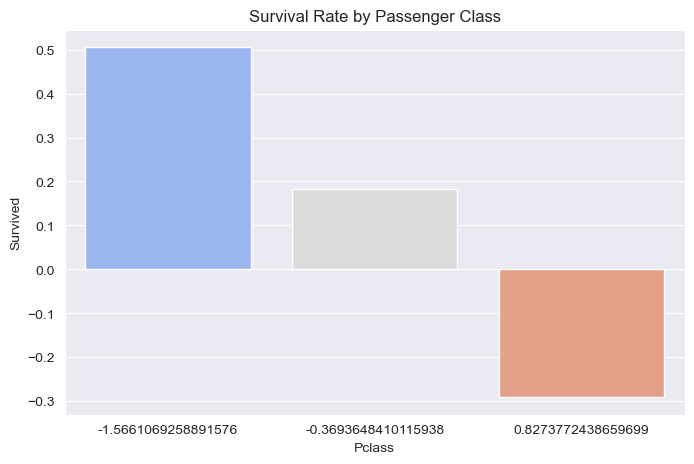

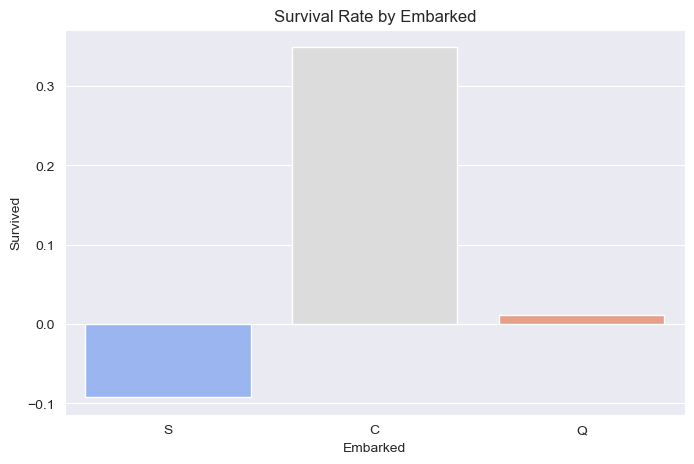

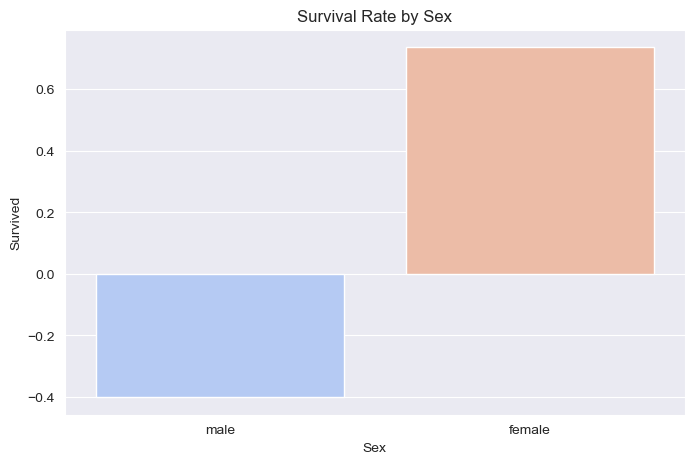

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None, palette='coolwarm')
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Embarked', y='Survived', data=df, ci=None, palette='coolwarm')
plt.title('Survival Rate by Embarked')
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df, ci=None, palette='coolwarm')
plt.title('Survival Rate by Sex')
plt.show()
